## NOTES

In [ ]:
# traning accuracy is greater than testing accuracy so it is overfitting
# traning accuracy is less than testing accuracy so it is underfitting
# traning accuracy is equal to testing accuracy so it is good model

## NOTES

In [41]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import sweetviz as sv
import seaborn as sns


/home/godslayer/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [42]:
x=[[500],[700],[900]]
y=[30,50,70]


In [43]:
model=LinearRegression()
model.fit(x,y)
model.predict([[1500]])

array([130.])

In [44]:
df=pd.read_csv("/home/godslayer/Desktop/Smart_Internz_Assignment/Practice/Data_set/Salary_Data.csv")

In [45]:
rep=sv.analyze(df)
rep.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [46]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [47]:
df.describe()

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/godslayer/snap/code/common/.cache/gio-modules/libgiolibproxy.so


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


/tmp/ipykernel_30670/3249851952.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/godslayer/snap/code/common/.cache/gio-modules/libgiolibproxy.so


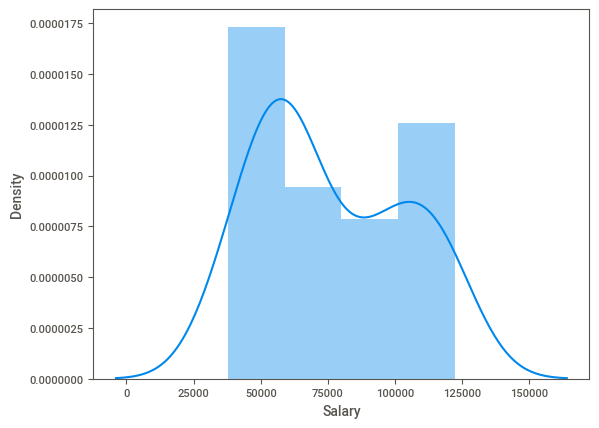

In [48]:
sns.distplot(df['Salary'])

In [49]:
df.corr(numeric_only=True)

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

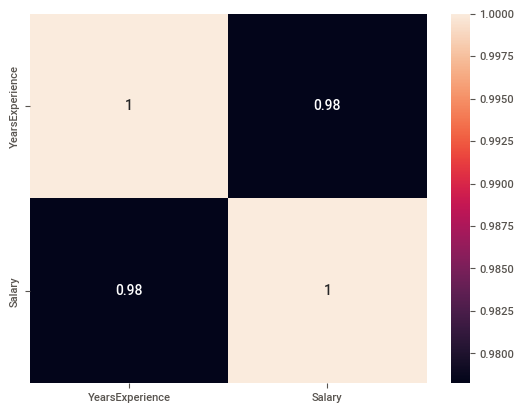

In [50]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [51]:
X=df.drop(['Salary'],axis=1)
y=df['Salary']
y.head()
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [54]:
X_train.shape

(24, 1)

In [55]:
X_test.shape

(6, 1)

In [56]:
y_train.shape


(24,)

In [57]:
y_test.shape

(6,)

In [58]:
from sklearn.linear_model import LinearRegression


In [59]:
model=LinearRegression()

In [60]:
model.fit(X_train,y_train)

LinearRegression()

In [61]:
print(model.predict(X_test))
# print(y_test)

[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


In [62]:
## Comparison between Actual and Predicted values
df1=pd.DataFrame({'Years of Experience':X_test['YearsExperience'],'Actual':y_test,'Predicted':model.predict(X_test)})
display(df1)

,Years of Experience,Actual,Predicted
2,1.5,37731.0,40748.961841
28,10.3,122391.0,122699.622956
13,4.1,57081.0,64961.657170
10,3.9,63218.0,63099.142145
26,9.5,116969.0,115249.562855
24,8.7,109431.0,107799.502753


## NEW DATASET

In [181]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [182]:
df=pd.read_csv("/home/godslayer/Desktop/Smart_Internz_Assignment/Practice/Data_set/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [183]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [184]:
df.State.unique()


array(['New York', 'California', 'Florida'], dtype=object)

In [185]:
df.State=le.fit_transform(df.State)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [186]:
df.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,74959.338704,121750.788889,214952.664722,1.027778,113523.760000
std,44996.368152,27322.385654,117937.942120,0.836753,38991.013654
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,38558.510000,105077.645000,134050.070000,0.000000,90708.190000
50%,75791.365000,122699.795000,239452.750000,1.000000,109543.120000
75%,101913.080000,145077.580000,298664.470000,2.000000,141585.520000
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    int64  
 4   Profit           108 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 4.3 KB


In [188]:
df.corr(numeric_only=True) # Correlation between the columns

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241379,0.725978,0.056264,0.964770
Administration,0.241379,1.000000,-0.024699,0.039406,0.198849
Marketing Spend,0.725978,-0.024699,1.000000,0.055431,0.748957
State,0.056264,0.039406,0.055431,1.000000,0.061662
Profit,0.964770,0.198849,0.748957,0.061662,1.000000


<Axes: >

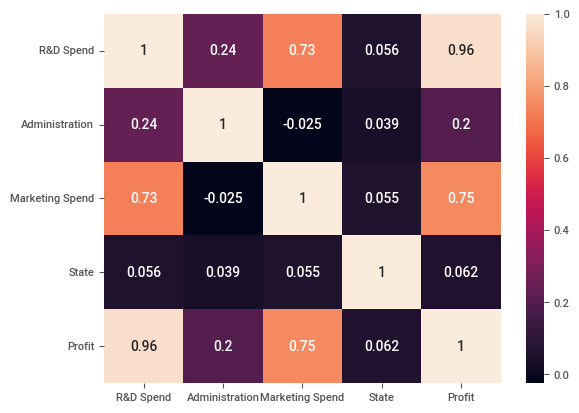

In [189]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [190]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()


In [191]:

y=df['Profit']
# df=df.drop(['State'],axis=1)  #If we drop this column then we will get better accuracy
X=df.drop(['Profit'],axis=1)

In [192]:
X_scaled =pd.DataFrame(scale.fit_transform(X),columns = X.columns)
X_scaled.head()

,R&D Spend,Administration,Marketing Spend,State
0,2.018191,0.556966,2.187835,1.167315
1,1.956756,1.089397,1.950290,-1.234019
2,1.752320,-0.757668,1.643929,-0.033352
3,1.549829,-0.113215,1.433223,1.167315
4,1.499255,-1.116321,1.288141,-0.033352


In [193]:
from sklearn.model_selection import train_test_split


In [194]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [195]:
from sklearn.linear_model import LinearRegression


In [209]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [197]:
y_predict=lr.predict(X_test)

In [198]:
y_predcit1=lr.predict(X_train)

In [199]:
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_predict})
print(df1)

        Actual      Predicted
84    64926.08   48379.248684
10   146121.95  134848.919247
75    90708.19   76483.109652
2    191050.39  181561.785292
24   108552.04  112966.000351
100  144259.40  134241.682572
107  124266.90  129222.387319
7    155752.60  160017.059198
16   126992.93  116752.960508
86    42559.73   46260.992641
68   101004.64  102266.360602
22   110352.25  115568.271776
45    64926.08   48379.248684
60   111313.02  119114.165255
76    89949.14   88602.220028
52   134307.35  127101.402736
13   134307.35  127101.402736
73    96712.80   90942.334215
85    49490.75   58677.733499
54   129917.04  146304.262152
103  132602.65  149410.054410
8    152211.77  152502.878104


In [204]:
lr.predict([[142107.70,91319,366168,2]])/10000

/home/godslayer/.local/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([647700.02491599])

## Evaluation Metrics of regression model

In [205]:
from sklearn import metrics

In [206]:
# R-Squared value
# testing the model
# testing accuracy
metrics.r2_score(y_test,y_predict)

0.9258962347553816

In [207]:
# training accuracy
metrics.r2_score(y_train,y_predcit1)

0.937696994680168

In [210]:
# MSE
metrics.mean_squared_error(y_test,y_predict)

96015241.54707724

In [211]:
# RMSE
np.sqrt(metrics.mean_squared_error(y_test,y_predict))

9798.7367322057